<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [149]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [122]:
!conda install python-graphviz

Solving environment: done

# All requested packages already installed.



In [150]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 14.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=f4a107aecfdc0d67b336881801ea2dfb119393c19b9dde649d0317133d0c2f35
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [328]:
import pandas as pd
import itertools
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.image as mpimg

from sklearn import preprocessing, metrics, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, jaccard_score, log_loss

In [329]:
# Additional libraries required
from  io import StringIO
import pylab as pl
import graphviz
import pydotplus
import scipy.optimize as opt
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [330]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-11-01 22:33:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-11-01 22:33:27 (157 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [331]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [332]:
df.shape

(346, 10)

### Convert to date time object


In [333]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [334]:
yt = df['loan_status']
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


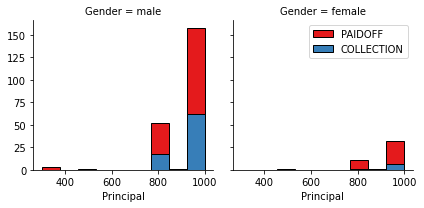

In [336]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

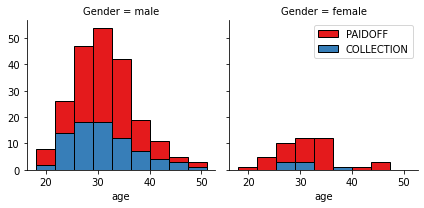

In [337]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


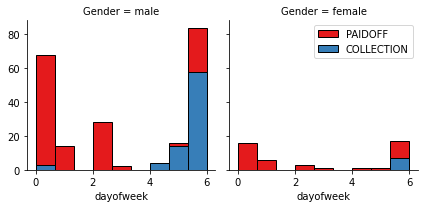

In [338]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [339]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [342]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan


Let's convert male to 0 and female to 1:


In [343]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [344]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [345]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame


In [346]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [353]:
X = Feature

What are our labels?


In [354]:
# Cast the target to an integer type 'PAIDOFF = 0' and 'COLLECTION = 1'
# df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0, 1], inplace=True)
pos_Lbl = 'PAIDOFF'

In [355]:
y = df['loan_status']

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [356]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [358]:
# specify maximum neighbors you want to try
Ks = 20

In [359]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4)

In [360]:
# Finding the best K for model
# best K value is where the there is least deviation of predicted value and the actual value.
# initial max. value of k
k_max = 0                                 

# We initialize containers to hold accuracy scores and standard deviation scores
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# we evaluate score for each trial of K
for n in range(1, Ks):
    # Train and refit into a new model with new trial value of K
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)

    #predict the new model using exist test data
    yhat = neigh.predict(X_test)

    # Evaluate the mean score and std
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])      
    
    # compare the new value with old
    if( mean_acc[n-1] > mean_acc[k_max]): k_max = n

# Best model
neigh = KNeighborsClassifier(n_neighbors = k_max).fit(X_train, y_train)
yhat_KNN = neigh.predict(X_test)
print("Best value for KNN = ", k_max)

# Evaluate the F1_score
F1_KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("F1_Score for KNN model = %.8f" %F1_KNN)

# Evaluate the Jaccard score
JS_KNN = jaccard_score(y_test, yhat_KNN, pos_label=pos_Lbl)
print("Jaccard Score for KNN model = %.8f" %JS_KNN)

Best value for KNN =  7
F1_Score for KNN model = 0.77665402
Jaccard Score for KNN model = 0.76562500


# Decision Tree


In [390]:
# Create an instance of decision tree. Use criterion as the classifier
dTree = tree.DecisionTreeClassifier(criterion ="entropy", max_depth= 7)

In [391]:
# Model with the train data set
dTree.fit(X_train, y_train)

# Predict the tree
yhat_Tree = dTree.predict(X_test)

In [392]:
# Score the decision tree
dTree_score = metrics.accuracy_score(y_test, yhat_Tree)
print("DecisionTrees's Accuracy: ", dTree_score)

# Evaluate the F1_score
F1_Tree = f1_score(y_test, yhat_Tree, average ='weighted')
print("F1_Score for Tree model = %.8f" %F1_Tree)

# Evaluate the Jaccard score
JS_Tree = jaccard_score(y_test, yhat_Tree, pos_label=pos_Lbl)
print("Jaccard Score for Tree model = %.8f" %JS_Tree)

DecisionTrees's Accuracy:  0.7571428571428571
F1_Score for Tree model = 0.69788107
Jaccard Score for Tree model = 0.75362319


In [393]:
y_train

188       PAIDOFF
299    COLLECTION
239       PAIDOFF
46        PAIDOFF
259       PAIDOFF
          ...    
306    COLLECTION
87        PAIDOFF
197       PAIDOFF
174       PAIDOFF
122       PAIDOFF
Name: loan_status, Length: 276, dtype: object

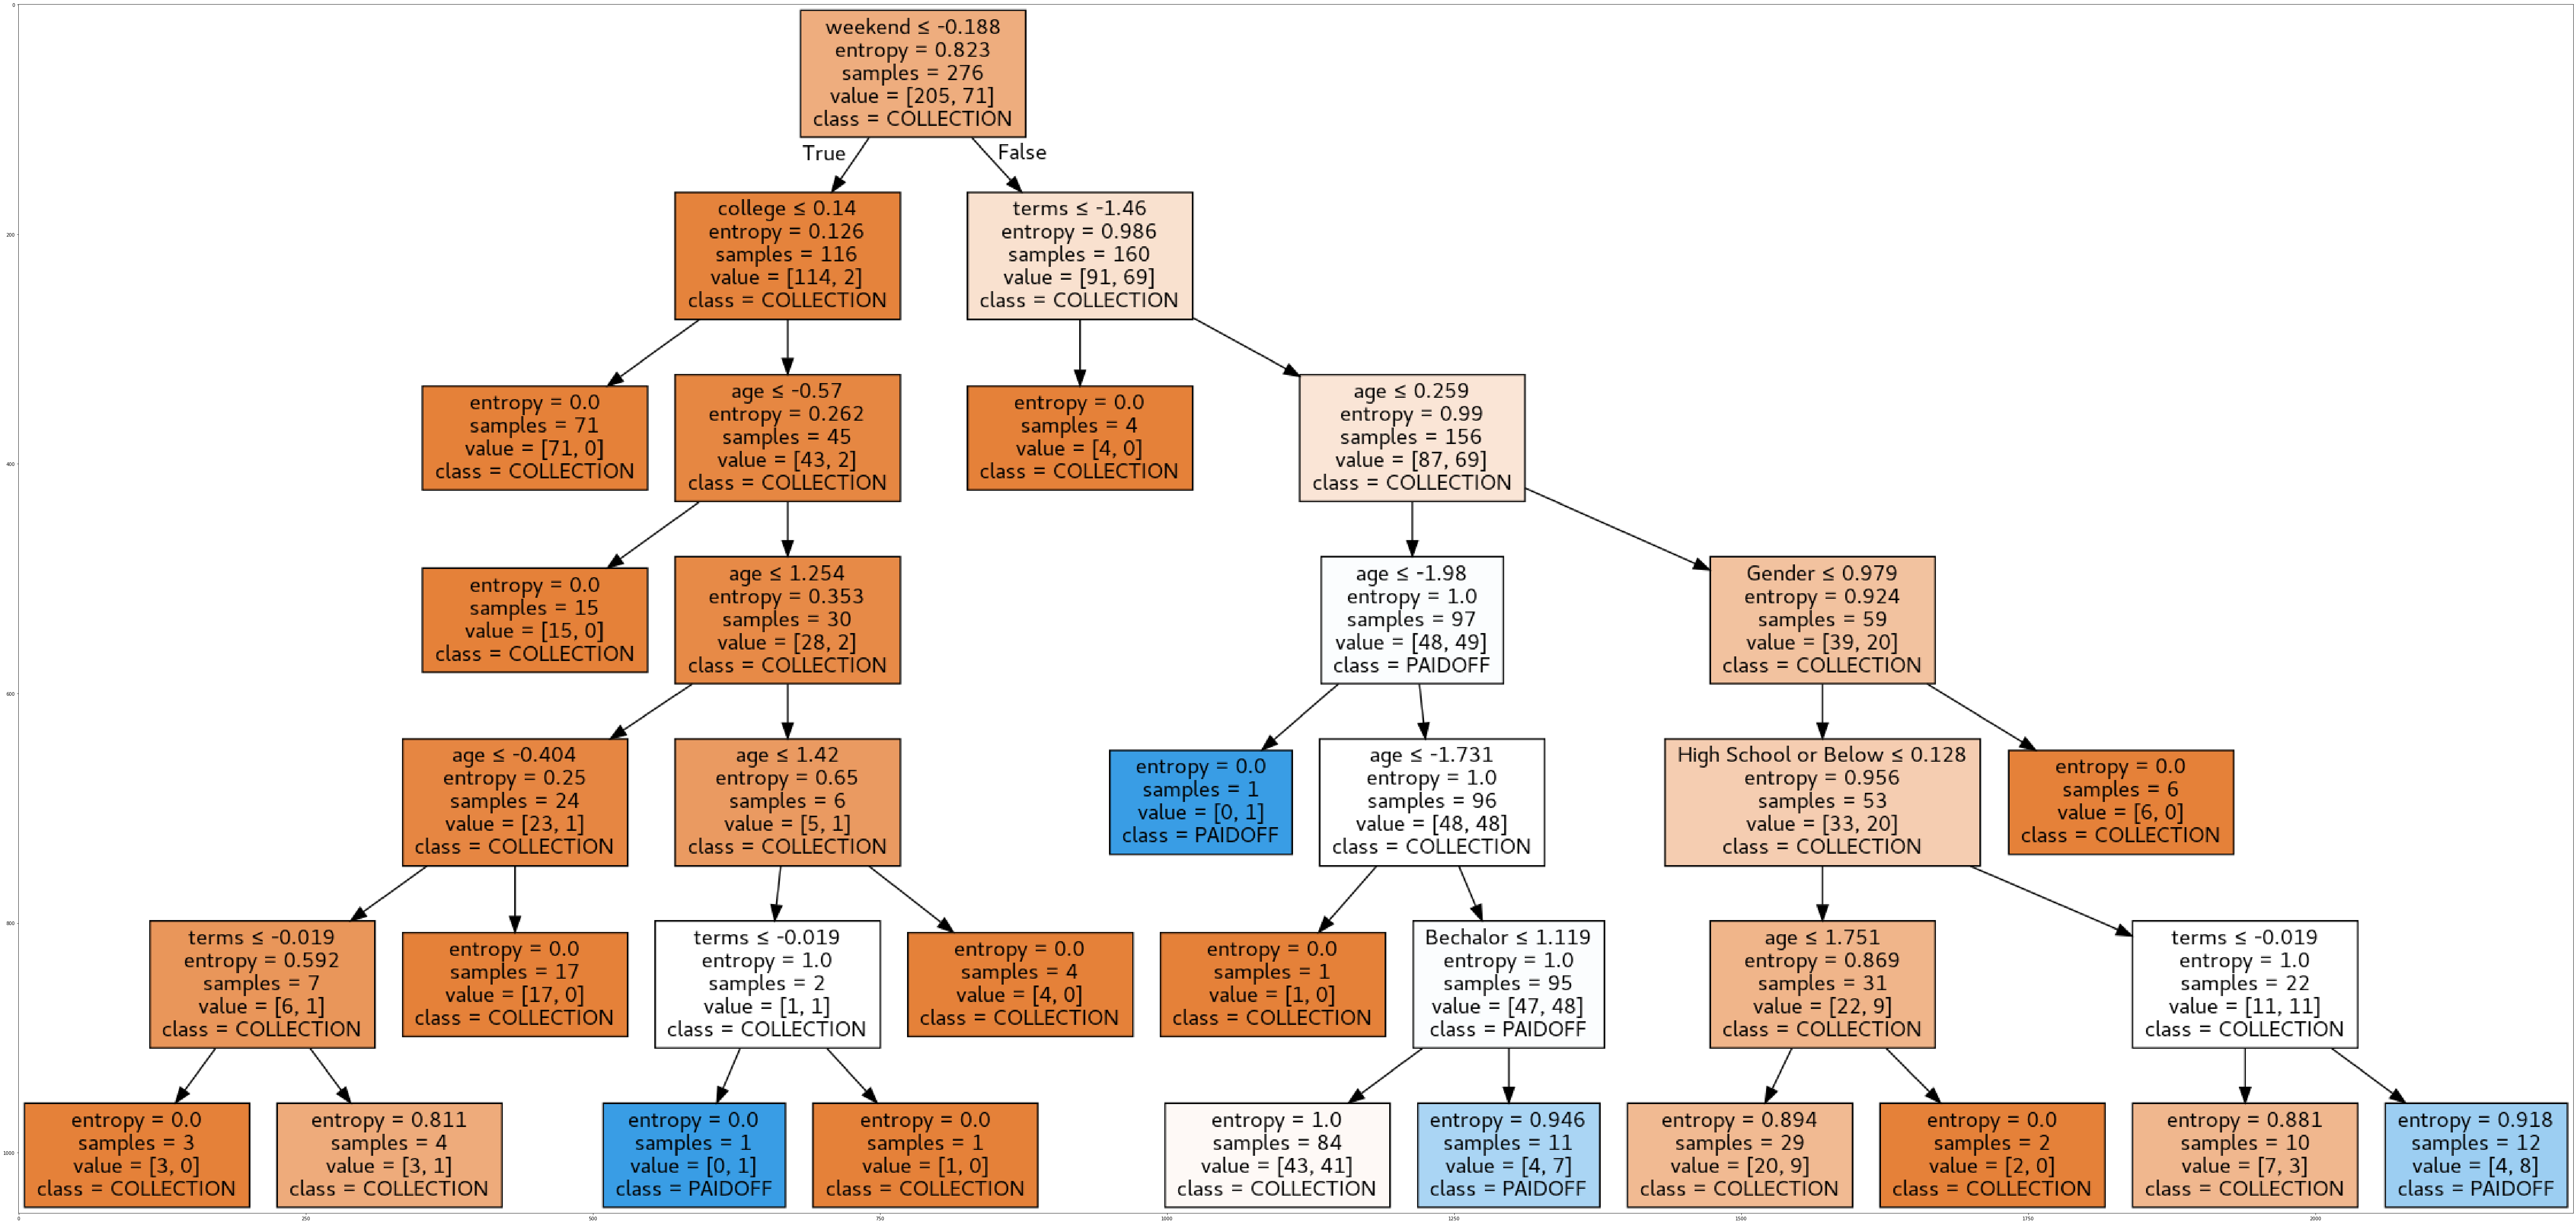

In [394]:
# Plotting Decision tree
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns[0:8]
out = tree.export_graphviz(dTree_fit, feature_names = featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True, special_characters=True, rotate= False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

# Support Vector Machine


In [402]:
# Create an SVM instance clf
clf = svm.SVC(kernel='rbf')

In [403]:
# Fit the model using the train data set. 
clf.fit(X_train, y_train) 

# Predict using test values
yhat_SVM = clf.predict(X_test)

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



<Figure size 432x288 with 0 Axes>

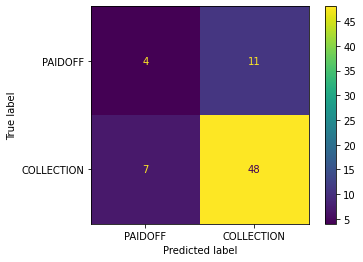

<Figure size 432x288 with 0 Axes>

In [405]:
# Compute confusion matrix
loan_matrix = confusion_matrix(y_test, yhat_SVM)

#print report
print (classification_report(y_test, yhat_SVM))
np.set_printoptions(precision=8)

# plot_confusion_matrix(loan_matrix, labels= , normalize= False,  title='Confusion matrix')
disp = ConfusionMatrixDisplay(loan_matrix, display_labels=['PAIDOFF','COLLECTION'])
disp.plot()

# Plot non-normalized confusion matrix
plt.figure()

In [406]:
# Evaluate the F1_score
F1_SVM = f1_score(y_test, yhat_SVM, average ='weighted')
print("F1_Score for SVM model = %.8f" %F1_SVM)

F1_Score for SVM model = 0.72758820


In [407]:
# Evaluate the Jaccard score
JS_SVM = jaccard_score(y_test, yhat_SVM, pos_label=pos_Lbl)
print("Jaccard Score for SVM model = %.8f" %JS_SVM)

Jaccard Score for SVM model = 0.72727273


# Logistic Regression


In [408]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

In [409]:
yhat_lr = LR.predict(X_test)

In [410]:
yhat_prob = LR.predict_proba(X_test)

In [411]:
# Evaluate the Jaccard score
JS_lr = jaccard_score(y_test, yhat_lr, pos_label=pos_Lbl)
print("Jaccard Score for LR model = %.8f" %JS_lr)

Jaccard Score for LR model = 0.67647059


In [412]:
# Evaluate the F1_score
F1_lr = f1_score(y_test, yhat_lr, average ='weighted')
print("F1_Score for LR model = %.8f" %F1_lr)

F1_Score for LR model = 0.66705225


              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



<Figure size 432x288 with 0 Axes>

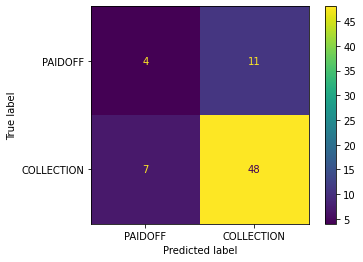

<Figure size 432x288 with 0 Axes>

In [413]:
#print report
print (classification_report(y_test, yhat_lr))
np.set_printoptions(precision=8)

# plot_confusion_matrix(loan_matrix, classes=[0,1], normalize= False,  title='Confusion matrix')
disp = ConfusionMatrixDisplay(loan_matrix, display_labels=['PAIDOFF','COLLECTION'])
disp.plot()
# Plot non-normalized confusion matrix
plt.figure()


# Model Evaluation using Test set


In [414]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [415]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-11-01 23:15:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-11-01 23:15:12 (59.6 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [416]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [417]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [318]:
Feature = test_df[['Principal','terms','age','Gender','weekend']]
XT = pd.concat([Feature, pd.get_dummies(test_df['education'])], axis=1)
XT.drop(['Master or Above'], axis = 1, inplace=True)
# Cast the target to an integer type 'PAIDOFF = 0' and 'COLLECTION = 1'
y_test = test_df['loan_status']

In [319]:
XT= preprocessing.StandardScaler().fit(XT).transform(XT)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [320]:
Algorithm=()
Jaccard=()
F1score=()
LogLoss=()

In [321]:
# K-NEAREST NEIGHBOR MODEL
# KNN model scoring
yhat_KNN = neigh.predict(XT)

# Evaluate the Jaccard score
JS_KNN = jaccard_score(y_test, yhat_KNN, pos_label=pos_Lbl)
print("Jaccard Score for KNN model = %.8f" %JS_KNN)

# Evaluate the F1_score
F1_KNN = f1_score(y_test, yhat_KNN, average ='weighted')
print("F1_Score for KNN model = %.8f" %F1_KNN)

knn_list=pd.DataFrame({'Jaccard Score':JS_KNN,'F1-score':F1_KNN, 'LogLoss':'?'}, index=['KNN'])

Jaccard Score for KNN model = 0.10000000
F1_Score for KNN model = 0.63284003


In [322]:
# DECISION TREE MODEL
# Predict the tree
yhat_Tree = dTree.predict(XT)

# Evaluate the Jaccard score
JS_Tree = jaccard_score(y_test, yhat_Tree, pos_label=pos_Lbl)
print("Jaccard Score for Tree model = %.8f" %JS_Tree)

# Evaluate the F1_score
F1_Tree = f1_score(y_test, yhat_Tree, average ='weighted')
print("F1_Score for Tree model = %.8f" %F1_Tree)

tree_list=pd.DataFrame({'Jaccard Score':JS_Tree,'F1-score':F1_Tree, 'LogLoss':'?'}, index=['Decision Tree'])

Jaccard Score for Tree model = 0.17647059
F1_Score for Tree model = 0.70067340


In [323]:
# SUPPORT VECTOR MODEL
# Predict using test values
yhat_SVM = clf.predict(XT)

# Evaluate the Jaccard score
JS_SVM = jaccard_score(y_test, yhat_SVM, pos_label=pos_Lbl)
print("Jaccard Score for SVM model = %.8f" %JS_SVM)

# Evaluate the F1_score
F1_SVM = f1_score(y_test, yhat_SVM, average ='weighted')
print("F1_Score for SVM model = %.8f" %F1_SVM)

SVM_list=pd.DataFrame({'Jaccard Score': JS_SVM,'F1-score':F1_SVM, 'LogLoss':'?'}, index=['Support Vector Machine'])

Jaccard Score for SVM model = 0.26666667
F1_Score for SVM model = 0.75835031


In [324]:
# yXT_test_lr = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0, 1])
# yXT_test_lr.head()

In [325]:
# LOGISTIC REGRESSION MODEL
# Predict using test values
yhat_lr = LR.predict(XT)
yhat_lr_prob = LR.predict_proba(XT)

# Evaluate the F1_score
F1_lr = f1_score(y_test, yhat_lr, average='weighted')
print("F1_Score for LR model = %.8f" %F1_lr)

# Evaluate the Jaccard score
JS_lr = jaccard_score(y_test, yhat_lr, pos_label= pos_Lbl)
print("Jaccard Score for LR model = %.8f" %JS_lr)

# Evaluate Log Loss
LL = log_loss(y_test, yhat_lr_prob)
print("Log Loss score for LR model = %.8f" %LL)

LL_list=['LogisticRegression', JS_lr, F1_lr, LL]

LL_list=pd.DataFrame({'Jaccard Score':JS_lr,'F1-score':F1_lr, 'LogLoss':LL}, index=['Logistic Regression'])

F1_Score for LR model = 0.66042673
Jaccard Score for LR model = 0.06666667
Log Loss score for LR model = 0.56721534


In [326]:
table = pd.concat([knn_list, tree_list, SVM_list, LL_list], axis=0, ignore_index=False)
table

,Jaccard Score,F1-score,LogLoss
KNN,0.100000,0.632840,?
Decision Tree,0.176471,0.700673,?
Support Vector Machine,0.266667,0.758350,?
Logistic Regression,0.066667,0.660427,0.567215


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
